In [60]:
# Script com conceitos sobre processamento de Linguagem Natural através da análise de sentimento

# Importando a biblioteca Pandas para mineração de dados
import pandas as pd

# Lendo o dataFrame sobre críticas de filmes feitas pelo site IMDB
resenha = pd.read_csv("imdb-reviews-pt-br.csv")
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1      Este é um exemplo do motivo pelo qual a maiori...       neg  
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3      Nem mesmo os Beatles puderam escrever músicas ...       neg  
4      Filmes de fotos de latão não é uma palavra apr...       neg  
...                                                  ...       ...  
49454  Como a média de votos era muito baixa, e o fat...       pos  
49455  O enredo teve algumas reviravoltas infelizes e...       pos  
49456  Estou espantado com a forma como este filme e ...       pos  
49457  A Christmas Together realmente veio antes do m...       pos  
49458  O drama romântico da classe trabalhadora do di...       pos  

[49459 rows x 4 columns]

In [61]:
# Analisando o comportamento de uma crítica negativa
print('negativas \n')
print(resenha.text_pt[1002])

negativas 

Eu não escrevo resenhas aqui muitas vezes, mas não posso ficar de pé e deixar que outras pessoas sofram com este filme sem ao menos tentar avisá-los. Este filme é horrível e não é porque "eu não sei o que o diretor estava tentando transmitir" ou "eu sou burro demais para entender o enredo"; este filme é horrível por causa da má direção, escrita e atuação de tela. Essa é a "trifecta" do movimento ruim e a razão pela qual o filme foi direto para o vídeo. Ele tenta ser algo como "Alta Tensão", "Hostel" e "TCSM" com o levantamento de algumas dessas idéias, mas simplesmente não funciona. Eu não tinha grandes expectativas, nem mesmo médias, indo para o filme, mas ainda estava muito decepcionado. Tinha potencial para ser muito bom com um bom cenário e boa ideia para um filme, mas foi desperdiçado.


In [62]:
# Analisando o comportamento de uma crítica positiva
print('positivas \n')
print(resenha.text_pt[49001])

positivas 

Quando Paris is Burning saiu, eu descartei totalmente isso. Eu não estava em todo o fenômeno da Madonna e da moda. Eu pensei que ia ser exagerado e bobo. Quão errado eu estava com esse filme. Eu assisti isso depois que o filme ficou fora por dez anos e eu corri para fora e comprei. Isso me levou de volta a um tempo e lugar de diversão e excitação. Eu senti como se conhecesse todos os personagens pessoalmente. Os anos 80 foram espetaculares e o filme capturou a essência da cultura gay. Que trabalho fantástico! Eu fui na internet e descobri o que alguns dos membros do elenco original estavam fazendo agora, mas eu não consegui localizar todos eles. Se alguém tiver alguma informação sobre algum dos membros do elenco, por favor me avise. Espero que eles façam outro documentário. EU AMEI


In [63]:
# Verificando se os dados estão balanceados através do método value_counts()
resenha.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [64]:
# Criando uma coluna de padronização para os sentimentos: Sentimento Positivo recebe 1, Sentimento Negativo recebe 0
# Essa padronização é importante para o processo de classificação dos modelos de machine learning
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])

resenha['classificacao'] = classificacao
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0  
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0  
4  Filmes de fotos de latão não é uma palavra apr...       neg              0

In [65]:
# Entendo o processo vetorização de textos, criando um bag of words ou saco de palavras para analisar as palavras do nosso dataframe divididas pela crítica positiva e negativa 
from sklearn.feature_extraction.text import CountVectorizer

# Teste didático para entender o retorno do processo de contagem de palavras
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bagOfWords = vetorizar.fit_transform(texto)
bagOfWords

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [66]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [67]:
# O retorno do processo de extração e contagem das palavras utilizando a CountVectorizer, ´é uma matriz esparsa que precisa ser transformada em um dataframe para melhor visualização dos dados
Matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bagOfWords, columns=vetorizar.get_feature_names())

In [68]:
Matriz_esparsa

Assisti  filme  ruim  um  ótimo
0        1      1     0   1      1
1        1      1     1   1      0

In [69]:
# Aplicando os conceitos para nosso caso real, e para um tamanho de 50 palavras mais contidas em nossos dados
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bagOfWords = vetorizar.fit_transform(resenha.text_pt)
print(bagOfWords.shape)

(49459, 50)


In [70]:
# Após os processos de extração da contagem de palavras, é possível aplicar um modelo de machine learning para classificar as reviews entre positiva e negativa
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def classifica_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False,       max_features=50)

    bagOfWords = vetorizar.fit_transform(texto[coluna_texto])

    treino, teste, classe_treino, classe_teste = train_test_split(bagOfWords, texto[coluna_classificacao], random_state = 42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)

    return regressao_logistica.score(teste, classe_teste)

print(classifica_texto(resenha, 'text_pt', 'classificacao'))

0.6583097452486858


In [71]:
# Entendendo o conceito de wordCloud/nuvem de palavras afim de analisar as palavras em destaque nas reviews e melhorar nosso modelo de classificação 
%matplotlib inline

from wordcloud import WordCloud

# Processo de juntar as palavras das reviews utiliando o separador de espaço
all_words = ' '.join([texto for texto in resenha.text_pt])

word_cloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(all_words)

<function matplotlib.pyplot.show(*args, **kw)>

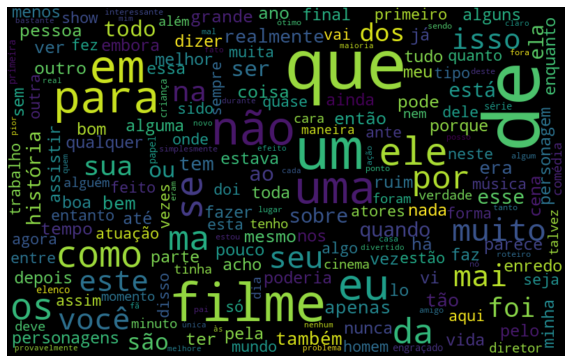

In [72]:
# Imprimindo as figuras das nuvens de palavras utilizando a biblioteca matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show

In [73]:
# Foi criada uma função de plotagem das nuvens de palavras para cada sentimento: negativo e positivo
def word_cloud_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'") 
    all_words = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    word_cloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(all_words)

    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [74]:
def word_cloud_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'") 
    all_words = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    word_cloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(all_words)

    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

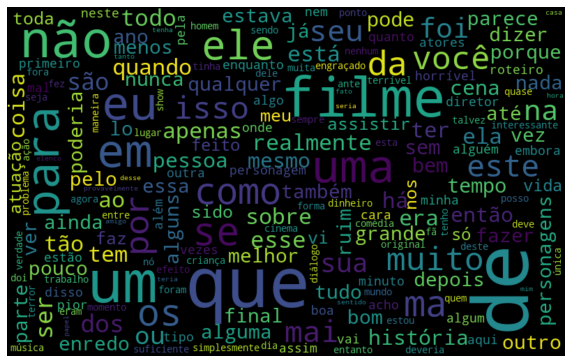

In [75]:
word_cloud_neg(resenha, 'text_pt')

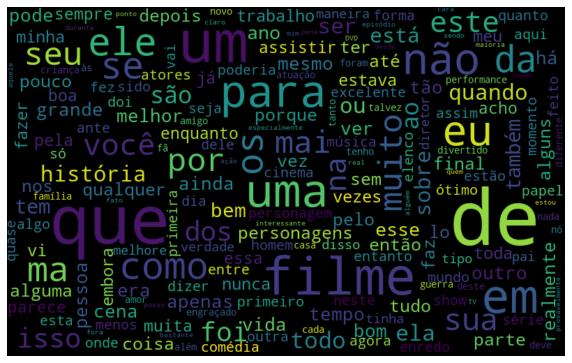

In [76]:
word_cloud_pos(resenha, 'text_pt')

In [77]:
# Conhecendo a poderosa biblioteca de processamento de linguagem natural do python: NLTK e outra forma de tokenização/separação das palavras
import nltk

nltk.download("all")

.mendonca\AppData\Roaming\nltk_dat
[nltk_data]    |     a...
[nltk_data]    |   Package comtrans is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\evoney.mendonca\AppData\Roaming\nltk_dat
[nltk_data]    |     a...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\evoney.mendonca\AppData\Roaming\nltk_dat
[nltk_data]    |     a...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package conll2007 to
[nltk_data]    |     C:\Users\evoney.mendonca\AppData\Roaming\nltk_dat
[nltk_data]    |     a...
[nltk_data]    |   Package conll2007 is already up-to-date!
[nltk_data]    | Downloading package crubadan to
[nltk_data]    |     C:\Users\evoney.mendonca\AppData\Roaming\nltk_dat
[nltk_data]    |     a...
[nltk_data]    |   Package crubadan is already up-to-date!
[nltk_data]    | Downloading package dependency_treeba

True

In [78]:
# Entendo o funcionamento da biblioteca utilizando o tokenize
from nltk import tokenize

frase =  'May the force be with you'

# Utilizando o espaço em branco como separador das palavras
token_space = tokenize.WhitespaceTokenizer()
token_frase = token_space.tokenize(frase)

token_frase

['May', 'the', 'force', 'be', 'with', 'you']

In [79]:
token_words = token_space.tokenize(all_words)
frequencia = nltk.FreqDist(token_words)

df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),"Frequência": list(frequencia.values())})

In [80]:
df_frequencia.nlargest(columns = "Frequência", n = 10)

Palavra  Frequência
20       de      417651
14      que      325070
42        e      299743
3         o      244881
7        um      216410
102       a      210179
45        é      192381
200      em      132778
1       uma      130888
29      não      127915

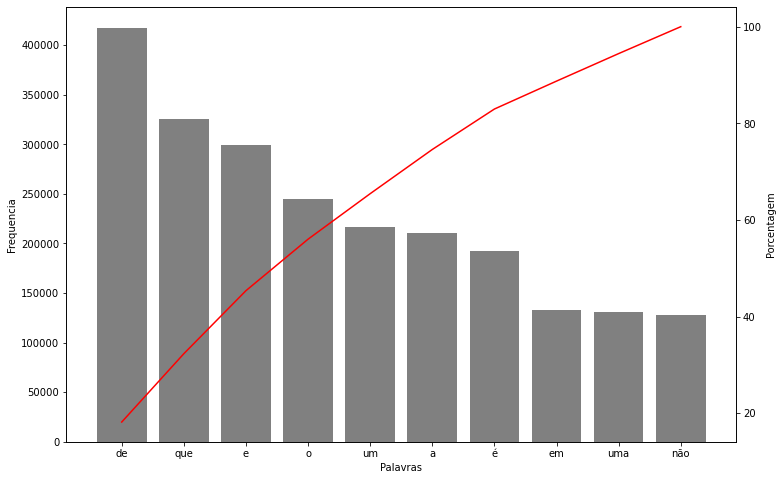

In [81]:
# Plotando um gráfico de pareto para a tokenização utilizando a biblioteca seaborn
import seaborn as sns 

def pareto(texto, coluna_texto, quantidade):
  plt.figure(figsize=(12,8))
  all_words = ' '.join([resenha for resenha in texto[coluna_texto]])
  token_espaco = nltk.tokenize.WhitespaceTokenizer()
  token_frase = token_espaco.tokenize(all_words)
  frequencias = nltk.FreqDist(token_frase)
  df_frequencias = pd.DataFrame({'Palavras': list(frequencias.keys()),
                               'Frequencia': list(frequencias.values())})
  df_frequencias = df_frequencias.nlargest(n=quantidade, columns='Frequencia')

  total = df_frequencias['Frequencia'].sum()
  df_frequencias['Porcentagem'] = df_frequencias['Frequencia'].cumsum() / total * 100

  ax = sns.barplot(data=df_frequencias, x='Palavras', y='Frequencia', color='gray')
  ax2 = ax.twinx()
  sns.lineplot(data=df_frequencias, x='Palavras', y='Porcentagem', color='red', sort=False, ax=ax2)
  plt.show()


pareto(resenha, 'text_pt', 10)

In [82]:
# Eliminando as chamadas stopwords ou seja, as palavras que não agregam a classificação do modelo
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_space.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_1"] = frase_processada

resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  
0  Mais vez, Sr. Costner arrumou filme tempo nece...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis, poderiam agi...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada eles, ve...

In [83]:
# Aplicando o modelo de classificação após o tratamento das stopwords: Percebe-se o aumento da acurácia após a remoção do que não agrega
classifica_texto(resenha, 'tratamento_1', 'classificacao')

0.6607359482410028

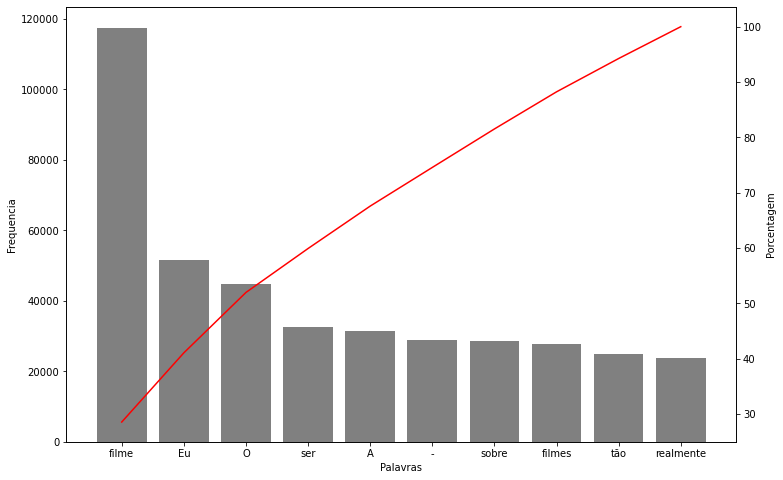

In [84]:
# Plotando o gráfico de pareto após a remoção das stopwords
pareto(resenha, 'tratamento_1', 10)

In [85]:
#### Refinando o modelo de classificação (PNL) #####

# Entendendo como separar a pontuação das palavras
from nltk import tokenize

frase = 'olá mundo!'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['olá', 'mundo', '!']


In [86]:
# Listando as pontuações
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_2'] = frase_processada        

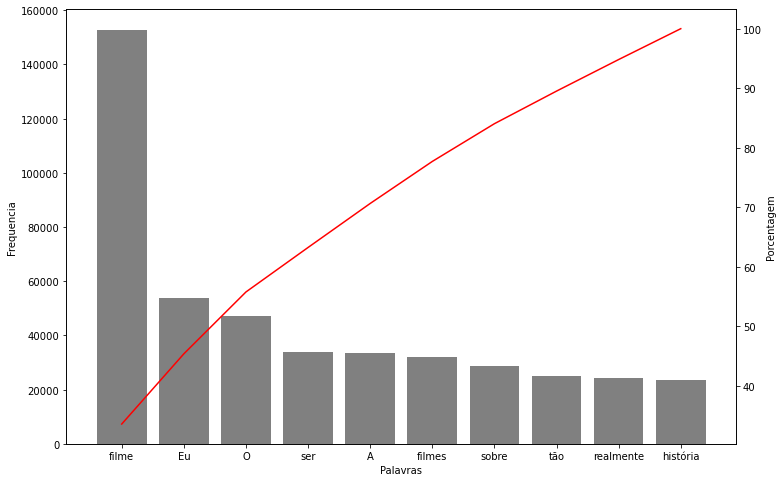

In [87]:
pareto(resenha, 'tratamento_2', 10)

In [88]:
# Retirando os acentos usando o unidecode
from unidecode import unidecode

acentos = 'ótimo péssimo não é tão'

teste = unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [89]:
# Aplicando a técnica de retirada de acentos para nossos dados de reviews
sem_acentos = [unidecode(texto) for texto in resenha['tratamento_2']]
stopwords_sem_acentos = [unidecode(texto) for texto in pontuacao_stopwords]
stopwords_sem_acentos

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 

In [90]:
# Tratando nossos dados e gerando uma nova coluna no dataframe onde são contidas as resenhas sem acentos a partir do tratamento anterior 
resenha['tratamento_3'] = sem_acentos

frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_3'] = frase_processada  

In [91]:
# Visualizando como ficaram os dados tratados
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada verdade ...   

                                        tratamento_3  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes acao mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever musicas todos gos...  
4  Filmes fotos latao palavra apropriada verdade ...

In [92]:
# Encontrando a acurácia para o tratamento 3 
classifica_texto(resenha, 'tratamento_3', 'classificacao')

0.6810351799433886

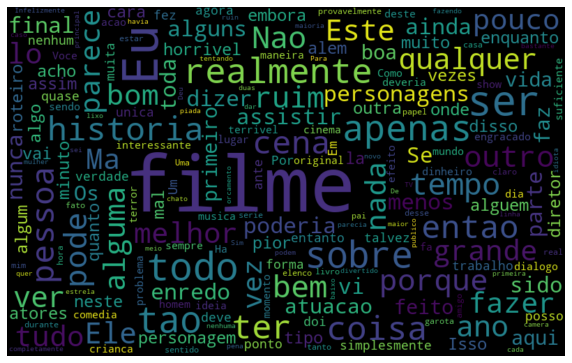

In [95]:
#Visualizando a wordCloud das palavras associadas com resenhas negativas para o tratamento 3
word_cloud_neg(resenha, 'tratamento_3')

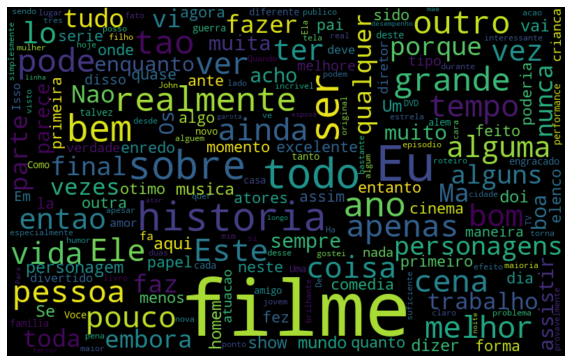

In [96]:
# Fazendo o mesmo processo para as críticas positivas
word_cloud_pos(resenha, 'tratamento_3')

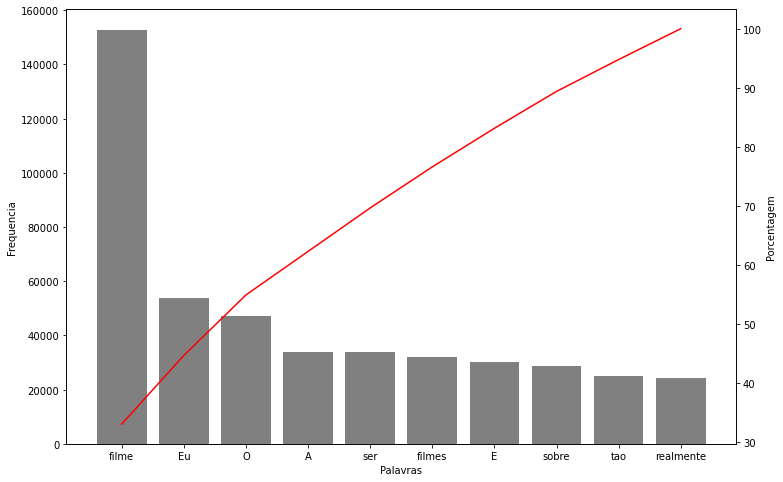

In [97]:
# Plotando o gráfico de pareto para as 10 palavras com maior destaque
pareto(resenha, 'tratamento_3', 10)

In [98]:
# Transformando texto em minúsculo
frase = 'o Evoney é o estagiário do Instituto Transire'
print(frase.lower())

o evoney é o estagiário do instituto transire


In [99]:
# Aplicando a técnica para os nossos dados, afim de verificar o beneficio para o modelo
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acentos:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_4'] = frase_processada

In [100]:
# Encontrando a acurácia para o tratamento 4
classifica_texto(resenha, 'tratamento_4', 'classificacao')

0.6879094217549535

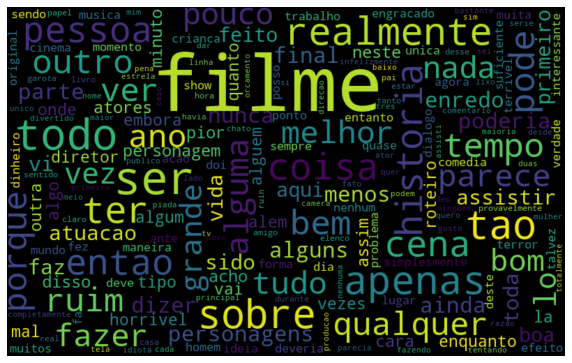

In [101]:
# Visualizando a nuvem de palavras das críticas negativas para o tratamento 4. Já é notável a melhoria da imagem
word_cloud_neg(resenha, 'tratamento_4')

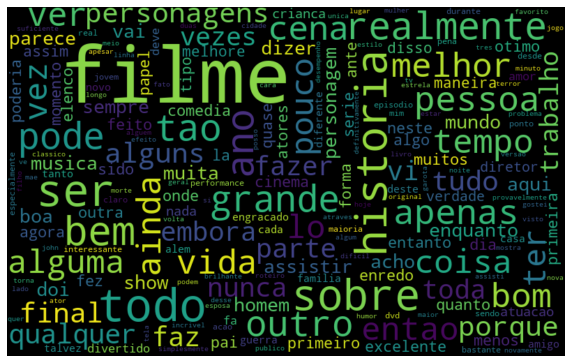

In [102]:
# O mesmo processo para as críticas positivas
word_cloud_pos(resenha, 'tratamento_4')

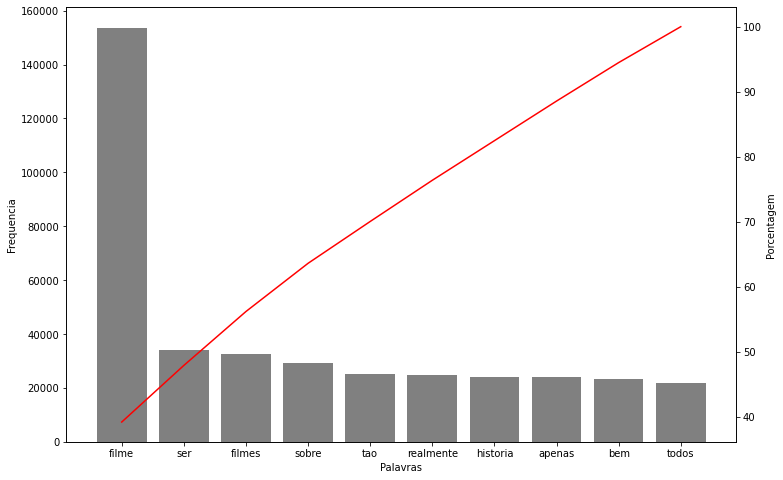

In [124]:
# Plotando o gráfico de pareto
pareto(resenha, 'tratamento_4', 10)

In [105]:
# Stemização, encontrar o radical comum das palavras

# Entendendo o processo de stemização com nltk e RSLP
stemmer = nltk.RSLPStemmer()
stemmer.stem('trabalhar')


'trabalh'

In [106]:
# Aplicando a técnica em nossos dados
frase_processada = list()
for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acentos:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_5'] = frase_processada

In [108]:
# Encontrando a acurácia
classifica_texto(resenha, 'tratamento_5', 'classificacao')

0.6943792964011323

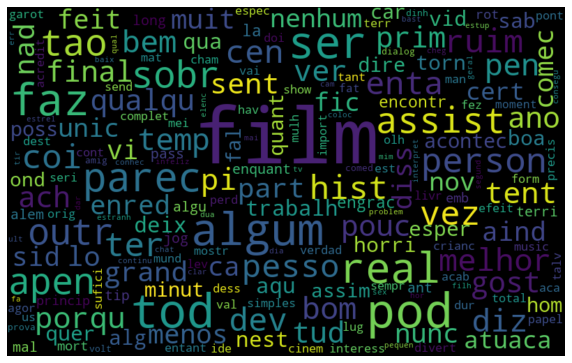

In [109]:
# Nuvem de palavras das críticas negativas
word_cloud_neg(resenha, 'tratamento_5')

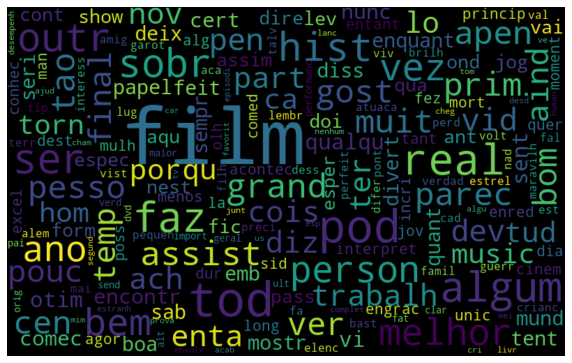

In [110]:
# Nuvem de palavras para as críticas positivas
word_cloud_pos(resenha, 'tratamento_5')

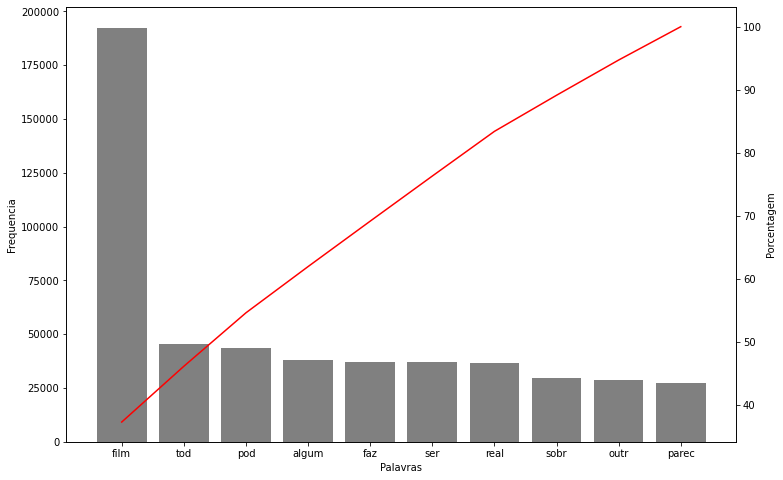

In [111]:
pareto(resenha, 'tratamento_5', 10)

In [112]:
# TF-IDF, nova forma de contar as palavras do nosso bag of words. Serve para diferenciar palavras através dos pesos da palavra dentro do documento

from sklearn.feature_extraction.text import TfidfVectorizer

frases = ['Assisti um filme ótimo', 'Assisti um filme péssimo']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(caracteristicas.todense(), columns=tfidf.get_feature_names())

Assisti     filme   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [115]:
tfidf_raw = tfidf.fit_transform(resenha['text_pt'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_raw, resenha['classificacao'], random_state = 42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_raw = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_raw

0.6600889607763849

In [116]:
tfidf_tratados = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, resenha['classificacao'], random_state = 42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_tratados

0.6988273352203801

In [119]:
# Ngrams, método de manter sequencia dentro do texto

# Entendo o conceito utilizando um biGram, ou seja, para duas palavras
from nltk import ngrams

token_espaco = nltk.tokenize.WhitespaceTokenizer()
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('o', 'Evoney'),
 ('Evoney', 'é'),
 ('é', 'o'),
 ('o', 'estagiário'),
 ('estagiário', 'do'),
 ('do', 'Instituto'),
 ('Instituto', 'Transire')]

In [120]:
# Aplicando a técnica aos nossos dados e treinando o modelo
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha['classificacao'], random_state = 42)

regressao_logistica.fit(treino, classe_treino)
regressao_logistica.score(teste, classe_teste)

0.8858875859280226

In [121]:
# Utilizando o modelo sem os Ngrams
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha['classificacao'], random_state = 42)

regressao_logistica.fit(treino, classe_treino)
regressao_logistica.score(teste, classe_teste)

0.8841892438334007

In [122]:
# Verificando como o modelo identificou os pesos para classificar as reviews como postiva e negativa
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)

pesos.nlargest(10, 0)

0
otim      8.290453
excel     7.978024
perfeit   6.578863
favorit   5.778016
maravilh  5.286499
incri     5.049494
hilari    4.653809
divert    4.579559
ador      4.422221
brilh     4.268574

In [123]:
pesos.nsmallest(10,0)

0
pi      -9.175670
ruim    -9.169680
horri   -8.751661
terri   -7.186900
chat    -6.919297
nad     -6.029846
infeliz -5.310530
decepca -4.995844
ridicul -4.950822
nenhum  -4.918824